In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q3

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [299]:
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/face.jpg'
image = cv2.imread(path)[:,:,::-1]

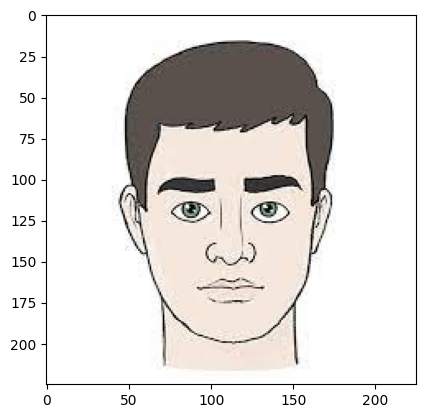

In [ ]:
plt.imshow(image)

In [357]:
def segment(image):

    img_copy = np.ones(image.shape[:2], dtype=np.uint8)
    segmented_image = image.copy()

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        diff = [255, 255, 255] - image[i, j]
        if (diff[0] + diff[1] + diff[2]) // 3 <= 70:
          img_copy[i, j] = 1
        else:
          img_copy[i, j] = 0
    ###
    ### your implementation
    ###
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    queue = []
    seed = (140, 140)
    queue.append(seed)

    while len(queue) > 0:
        x, y = queue.pop(0)
        if x < 0 or x >= segmented_image.shape[0] or y < 0 or y >= segmented_image.shape[1]:
          continue
        if mask[x, y] == 255:
          continue
        if img_copy[x, y] == 1:
          mask[x, y] = 255
          segmented_image[x, y] = [255, 255, 0]
          queue.append((x+1, y))
          queue.append((x-1, y))
          queue.append((x, y-1))
          queue.append((x, y+1))

    return segmented_image

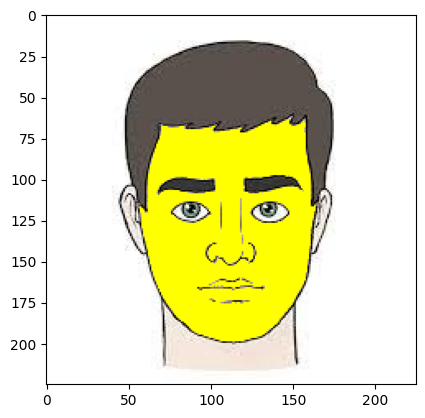

In [358]:
segmented_image = segment(image)
plt.imshow(segmented_image)